In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-jzsgboy0 because the default path (/home/user/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Importing and Exporting Data

In [2]:
path = "./files/iris.csv"

headers = []

# df = pd.read_csv(path, sep=";")
df = pd.read_csv("./files/imports-85.data")
# pd.set_option('display.max_rows', 500)

headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
           "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
           "peak-rpm", "city-mpg", "highway-mpg", "price"]

df.columns = headers
df.info()
# df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [3]:
# Remove missing values
# print(df.head())
df.replace("?", np.nan, inplace=True)
for col in df.columns:
    if df[col].isna().values.any() == True:
        print(col + " " + str(df[col].isna().values.any()))


normalized-losses True
num-of-doors True
bore True
stroke True
horsepower True
peak-rpm True
price True


In [4]:
# normalized-losses
df["normalized-losses"].replace(np.nan, df[~df["normalized-losses"].isnull()]
                                ["normalized-losses"].astype("int").mean(), inplace=True)
df["normalized-losses"] = df["normalized-losses"].astype("int")
# num-of-doors
df = df[~df["num-of-doors"].isna()]
# bore
df_bore_finding = df[~df["bore"].isna()]
df_bore_finding["bore"] = df_bore_finding["bore"].astype("float")
df_mean = df_bore_finding.groupby(
    ["make", "body-style"], as_index=False).mean()
df_mean[df_mean["make"] == "mazda"][df_mean["body-style"] == "hatchback"]["bore"]

df["bore"].replace(np.nan, df_mean[df_mean["make"] == "mazda"]
                   [df_mean["body-style"] == "hatchback"]["bore"].max(), inplace=True)
df["bore"] = df["bore"].astype("float")
# stroke
df_bore_finding = df[~df["stroke"].isna()]
df_bore_finding["stroke"] = df_bore_finding["stroke"].astype("float")
df_mean = df_bore_finding.groupby(
    ["make", "body-style"], as_index=False).mean()
df_mean[df_mean["make"] == "mazda"][df_mean["body-style"] == "hatchback"]["stroke"]

df["stroke"].replace(np.nan, df_mean[df_mean["make"] == "mazda"]
                     [df_mean["body-style"] == "hatchback"]["stroke"].max(), inplace=True)
df["stroke"] = df["stroke"].astype("float")
# horsepower
df_hp = df[~df["horsepower"].isna()]
df_hp_mean = df_hp[df_hp['body-style'] == 'wagon'][df_hp['bore']
                                                   >= 3.46][df_hp['bore'] <= 3.50]['horsepower'].astype("int").mean()
df["horsepower"].replace(np.nan, df_hp_mean, inplace=True)
df["horsepower"] = df["horsepower"].astype("int")
df[df["make"] == "renault"]
# peak-rpm
df_hp = df[~df["peak-rpm"].isna()]
df_hp_mean = df_hp[df_hp['body-style'] == 'wagon'][df_hp['bore']
                                                   >= 3.46][df_hp['bore'] <= 3.50]['peak-rpm'].astype("int").mean()
df["peak-rpm"].replace(np.nan, df_hp_mean, inplace=True)
df["peak-rpm"] = df["peak-rpm"].astype("int")
# price
df[df['price'].isna()]
df_price = df[~df['price'].isna()]
df_price['price'] = df['price'].astype("float")
for index, row in df[df['price'].isna()].iterrows():
    row_mean = df_price[df_price["body-style"] == row["body-style"]
                        ][df_price["drive-wheels"] == row["drive-wheels"]]["price"].mean().round(2)
    df.loc[index, "price"] = row_mean

df["price"] = df["price"].astype("float")
df.describe()


/tmp/ipykernel_17837/3544775526.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bore_finding["bore"] = df_bore_finding["bore"].astype("float")
/tmp/ipykernel_17837/3544775526.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mean[df_mean["make"] == "mazda"][df_mean["body-style"] == "hatchback"]["bore"]
/tmp/ipykernel_17837/3544775526.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df["bore"].replace(np.nan, df_mean[df_mean["make"] == "mazda"]
/tmp/ipykernel_17837/3544775526.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.826733,121.871287,98.831683,174.139604,65.924257,53.755941,2557.965347,127.059406,3.327871,3.257228,10.098614,104.351485,5125.247525,25.193069,30.717822,13184.948515
std,1.243762,31.863566,6.013061,12.364039,2.151791,2.423638,523.854860,41.900456,0.272342,0.313024,3.897109,39.716911,478.706994,6.539383,6.886758,7936.072150
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.425000,64.125000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10221.500000
75%,2.000000,137.000000,102.400000,183.400000,66.900000,55.500000,2947.750000,144.000000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# After solving missing values
# print(df.head())
# df[~df.isna()]
for col in df.columns:
    if df[col].isna().values.any() == True:
        print(col + " " + str(df[col].isna().values.any()))

In [6]:
# Data formattting
# print(df.dtypes)
# # Changing row data type
# df["sepal.length"] = df["sepal.length"].astype("int")
# print(df.dtypes)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  202 non-null    int64  
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [7]:
# Data normalization

# SIMPLE FEATURE SCALING
# df["petal.length"] = (df["petal.length"]/df["petal.length"].max())
# df

# MIN-MAX
# This will change whole column to a range from 0 to 1 with 0 as low value and 1 to the column maximum value;
df["normalized-losses"] = (df["normalized-losses"]-df["normalized-losses"].min())/(df["normalized-losses"].max()-df["normalized-losses"].min())

# Z-SCORE
# df["petal.length"] = (df["petal.length"]-df["petal.length"].mean())/df["petal.length"].std()


# df.describe()

# Can be used in data analysis but not for data prediction (i guess)

In [8]:
# Binning

bins = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 4)
group_names = ["Low", "Medium", "High"]
df["binned_horsepower"] = pd.cut(
    df['horsepower'], bins, labels=group_names, include_lowest=True)

df.describe()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.826733,0.297755,98.831683,174.139604,65.924257,53.755941,2557.965347,127.059406,3.327871,3.257228,10.098614,104.351485,5125.247525,25.193069,30.717822,13184.948515
std,1.243762,0.166825,6.013061,12.364039,2.151791,2.423638,523.854860,41.900456,0.272342,0.313024,3.897109,39.716911,478.706994,6.539383,6.886758,7936.072150
min,-2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,0.188482,94.500000,166.425000,64.125000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,0.298429,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10221.500000
75%,2.000000,0.376963,102.400000,183.400000,66.900000,55.500000,2947.750000,144.000000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# Turning categorical variables into quatitative
# Need last code to run ok
df1 = pd.get_dummies(df.binned_horsepower)

df = pd.concat([df, df1], axis=1)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,binned_horsepower,Low,Medium,High
0,3,0.298429,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,16500.0,Low,1,0,0
1,1,0.298429,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000,19,26,16500.0,Medium,0,1,0
2,2,0.518325,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500,24,30,13950.0,Low,1,0,0
3,2,0.518325,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500,18,22,17450.0,Low,1,0,0
4,2,0.298429,audi,gas,std,two,sedan,fwd,front,99.8,...,8.5,110,5500,19,25,15250.0,Low,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,0.157068,volvo,gas,std,four,sedan,rwd,front,109.1,...,9.5,114,5400,23,28,16845.0,Low,1,0,0
200,-1,0.157068,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,8.7,160,5300,19,25,19045.0,Medium,0,1,0
201,-1,0.157068,volvo,gas,std,four,sedan,rwd,front,109.1,...,8.8,134,5500,18,23,21485.0,Medium,0,1,0
202,-1,0.157068,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,23.0,106,4800,26,27,22470.0,Low,1,0,0


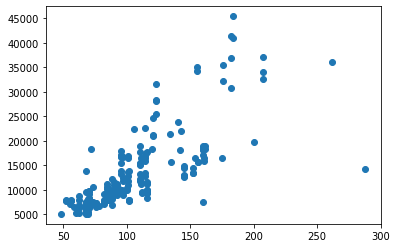

In [10]:
# Descriptive Statistics

# print(df.describe())
# print(df["variety"].value_counts().to_frame())
# print(df.boxplot())

y = df["price"]
x = df["horsepower"]
print(pyplot.scatter(x, y))


### Correlation

(0.0, 52456.403803538175)

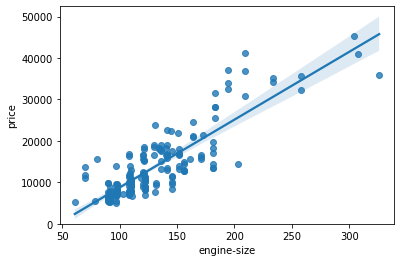

In [11]:
sns.regplot(x="engine-size", y="price", data=df)
plt.pyplot.ylim(0,)


(0.0, 48128.643717001716)

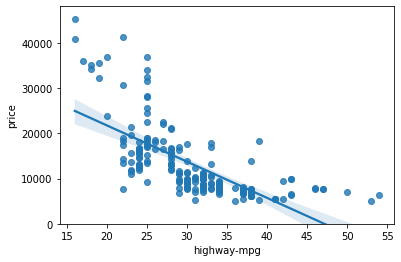

In [12]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.pyplot.ylim(0,)


### Pearson Correlation

In [13]:
# Measure the strength of the correlation betweern two features
# pearson_coef From -1 and 1 (Negative to positive correlation)
# p_value is the certain of result as p_value < 0.001 for strong, p_value < 0.05 moderate, p_value < 0.1 weak, p_value > 0.1 no certain

pearson_coef, p_value = stats.stats.pearsonr(df["horsepower"], df["price"])

print("Coef is ", pearson_coef.round(3))
print("PValue is ", p_value)

Coef is  0.76
PValue is  2.6212615986586974e-39


## Model Development

### Simple Linear Regression

In [14]:
lm = LinearRegression()
x = df[['highway-mpg']]
y = df['price']

lm.fit(x, y)
Yhat = lm.predict(x)
print(Yhat)


[16166.81315603 16968.85930453 13760.67471055 20177.0438985
 17770.90545302 17770.90545302 17770.90545302 21781.13619549
 20177.0438985  14562.72085905 14562.72085905 15364.76700754
 15364.76700754 17770.90545302 20177.0438985  20177.0438985
 21781.13619549 -4686.38670479  3334.07478014  3334.07478014
  4938.16707713  7344.30552261 13760.67471055  7344.30552261
  7344.30552261  7344.30552261 13760.67471055 18572.95160151
 -5488.43285329  7344.30552261  4136.12092863 10552.49011658
 10552.49011658 10552.49011658 10552.49011658 11354.53626507
 11354.53626507 11354.53626507 11354.53626507 15364.76700754
 12958.62856206 14562.72085905  3334.07478014  3334.07478014
 14562.72085905 22583.18234398 22583.18234398 24187.27464097
 12958.62856206  7344.30552261  7344.30552261  7344.30552261
  7344.30552261 19374.99775001 19374.99775001 19374.99775001
 19374.99775001 12156.58241357 12156.58241357 12156.58241357
 12156.58241357 12156.58241357 16166.81315603  6542.25937411
 17770.90545302 17770.9054

/home/user/backup/PythonDataScience/env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/user/backup/PythonDataScience/env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

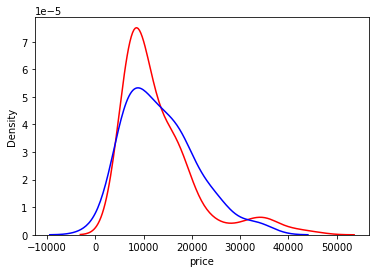

In [15]:
from array import array
from sklearn.model_selection import train_test_split

dfA = df.loc[:]

lm = LinearRegression()
z = np.array(df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
y = np.array(df['price'])

x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.3)

lm.fit(x_train, y_train)
Yhat = lm.predict(x_test)


ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)


/home/user/backup/PythonDataScience/env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

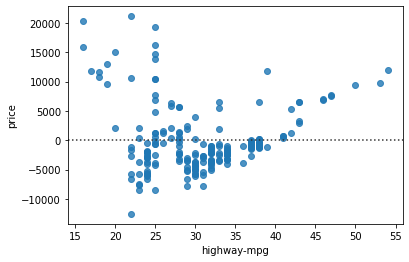

In [16]:
sns.residplot(df["highway-mpg"], df["price"])

/home/user/backup/PythonDataScience/env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/user/backup/PythonDataScience/env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

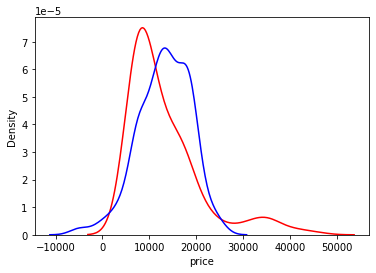

In [17]:
lm = LinearRegression()
x = df[['highway-mpg']]
y = df['price']

lm.fit(x, y)
Yhat = lm.predict(x)


ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)


In [18]:
# Mean Square Error
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
x = df[['highway-mpg']]
y = df['price']

lm.fit(x, y)
Yhat = lm.predict(x)

print(mean_squared_error(df["price"], Yhat))
print(lm.score(x, y))

32311456.47610495
0.48441457513729946
